In [1]:
import numpy as np
from numpy.random import uniform, poisson
import matplotlib.pyplot as plt

### GLM - conceito

Os modelos lineares generalizados surgiram com o objetivo de tentar solucionar problemas que uma regressão linear comum não abrange. Por exemplo: em um caso de regressão linear onde os valores são não negativos (crédito tomado, por exemplo), um modelo de regressão linear pode assumir que existam valores menores que 0 para a variável target, pois não há nenhuma restrição quanto a isso na regressão. Outro exemplo é quando os erros não possuem variância constante e dependem da média. Os GLM's tentam resolver estes problemas, adequando o modelo à variável target.

Resumidamente, existe um componente aleatório (variável target) que pertence à uma família de distribuições exponenciais (bernoulli, binomial, poisson, gamma), um componente sistemático (variáveis explicativas) e uma função de ligação que faz o link funcional entre os dois componentes.

In [2]:
# exemplo GLM Poission

np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

X = uniform(1, 5, size = n_sample)
mu = np.exp(a * X + b)
y = poisson(mu)

import statsmodels.api as sm

# exog = independentes e endog = dependente
exog, endog = sm.add_constant(X), y

# regressão de poisson
mod = sm.GLM(endog, exog, family = sm.families.Poisson(link = sm.families.links.log()))
res = mod.fit()
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -213.95
Date:                Wed, 12 Jan 2022   Deviance:                       120.86
Time:                        21:07:46   Pearson chi2:                     115.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2789      0.162     -1.720      0.085      -0.597       0.039
x1             0.5646      0.042     13.508      0.000       0.483       0.647
==============================================================================
"""

Text(0, 0.5, 'Y')

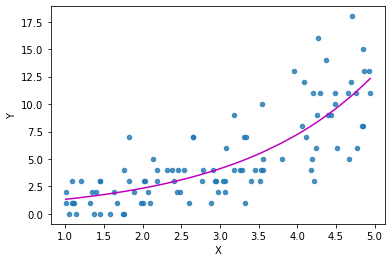

In [3]:
y_pred = res.predict(exog)

idx = X.argsort()
x_ord, y_pred_ord = X[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(X, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

Alterando a função de ligação a distribuição de probabilidade podemos chegar em novos tipos de regressão.

A regressão linear também é um exemplo de GLM, onde a função de ligação é uma função identidade, isto é, o preditor linear o parâmetro para a distribuição de probabilidade são os mesmos, e a distribuição de probabilidade é uma distribuição normal.